In [1]:
from training.utils.trainer import Trainer

2023-12-05 14:44:51.094254: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
trainer = Trainer(dataset="mnist", mode="dpnn")

{'name': 'mnist', 'model_name': 'VGG16', 'gray': True, 'torch': True, 'num_classes': 10, 'local': False}
----------------Loading datasets-----------------
---------------Loading dataloader----------------
DataLoader initialized
DataLoader initialized


/home/bot/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/bot/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Draw Graph in Tensorboard


/home/bot/.local/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/home/bot/.local/lib/python3.10/site-packages/torch/jit/_trace.py:1065: TracerWarning: Encountering a list at the output of the tracer might cause the trace to be incorrect, this is only valid if the container structure does not change based on the module's inputs. Consider usin

In [12]:
trainer.correct_module()

[]


In [13]:
loss, acc, loss_t, acc_t, eps = trainer.train()

Training-Process started! -> 15 epochs


/home/bot/.local/lib/python3.10/site-packages/opacus/privacy_engine.py:142: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
  warnings.warn(
/home/bot/.local/lib/python3.10/site-packages/opacus/accountants/analysis/rdp.py:332: UserWarning: Optimal order is the largest alpha. Please consider expanding the range of alphas to get a tighter privacy bound.
  warnings.warn(
/home/bot/.local/lib/python3.10/site-packages/opacus/accountants/analysis/prv/prvs.py:50: RuntimeWarning: invalid value encountered in log
  z = np.log((np.exp(t) + q - 1) / q)
/home/bot/.local/lib/python3.10/site-packages/opacus/accountants/analysis/rdp.py:332: UserWarning: Optimal order is the smallest alpha. Please consider expanding the range of alphas to get a tighter privacy bound.
  warnings.warn(
/home/bot/.local/lib/python3.10/site

Epoch:0	Time:203.02	Train Loss:0.87	Train Acc:77.00	Test Acc90.85
Epoch:1	Time:226.24	Train Loss:0.23	Train Acc:92.50	Test Acc94.47
Epoch:2	Time:233.60	Train Loss:0.17	Train Acc:94.74	Test Acc95.55
Epoch:3	Time:231.93	Train Loss:0.15	Train Acc:95.60	Test Acc96.02
Epoch:4	Time:232.80	Train Loss:0.13	Train Acc:96.03	Test Acc96.58
Epoch:5	Time:206.23	Train Loss:0.12	Train Acc:96.42	Test Acc96.68
Epoch:6	Time:207.22	Train Loss:0.11	Train Acc:96.69	Test Acc96.88
Epoch:7	Time:205.04	Train Loss:0.11	Train Acc:96.79	Test Acc97.14
Epoch:8	Time:205.97	Train Loss:0.11	Train Acc:96.81	Test Acc97.32
Epoch:9	Time:207.25	Train Loss:0.10	Train Acc:97.06	Test Acc97.38
Epoch:10	Time:211.29	Train Loss:0.10	Train Acc:97.09	Test Acc97.38
Epoch:11	Time:208.51	Train Loss:0.10	Train Acc:97.08	Test Acc97.54
Epoch:12	Time:208.00	Train Loss:0.10	Train Acc:97.16	Test Acc97.60
Epoch:13	Time:208.78	Train Loss:0.09	Train Acc:97.30	Test Acc97.68
Epoch:14	Time:210.14	Train Loss:0.09	Train Acc:97.39	Test Acc97.78


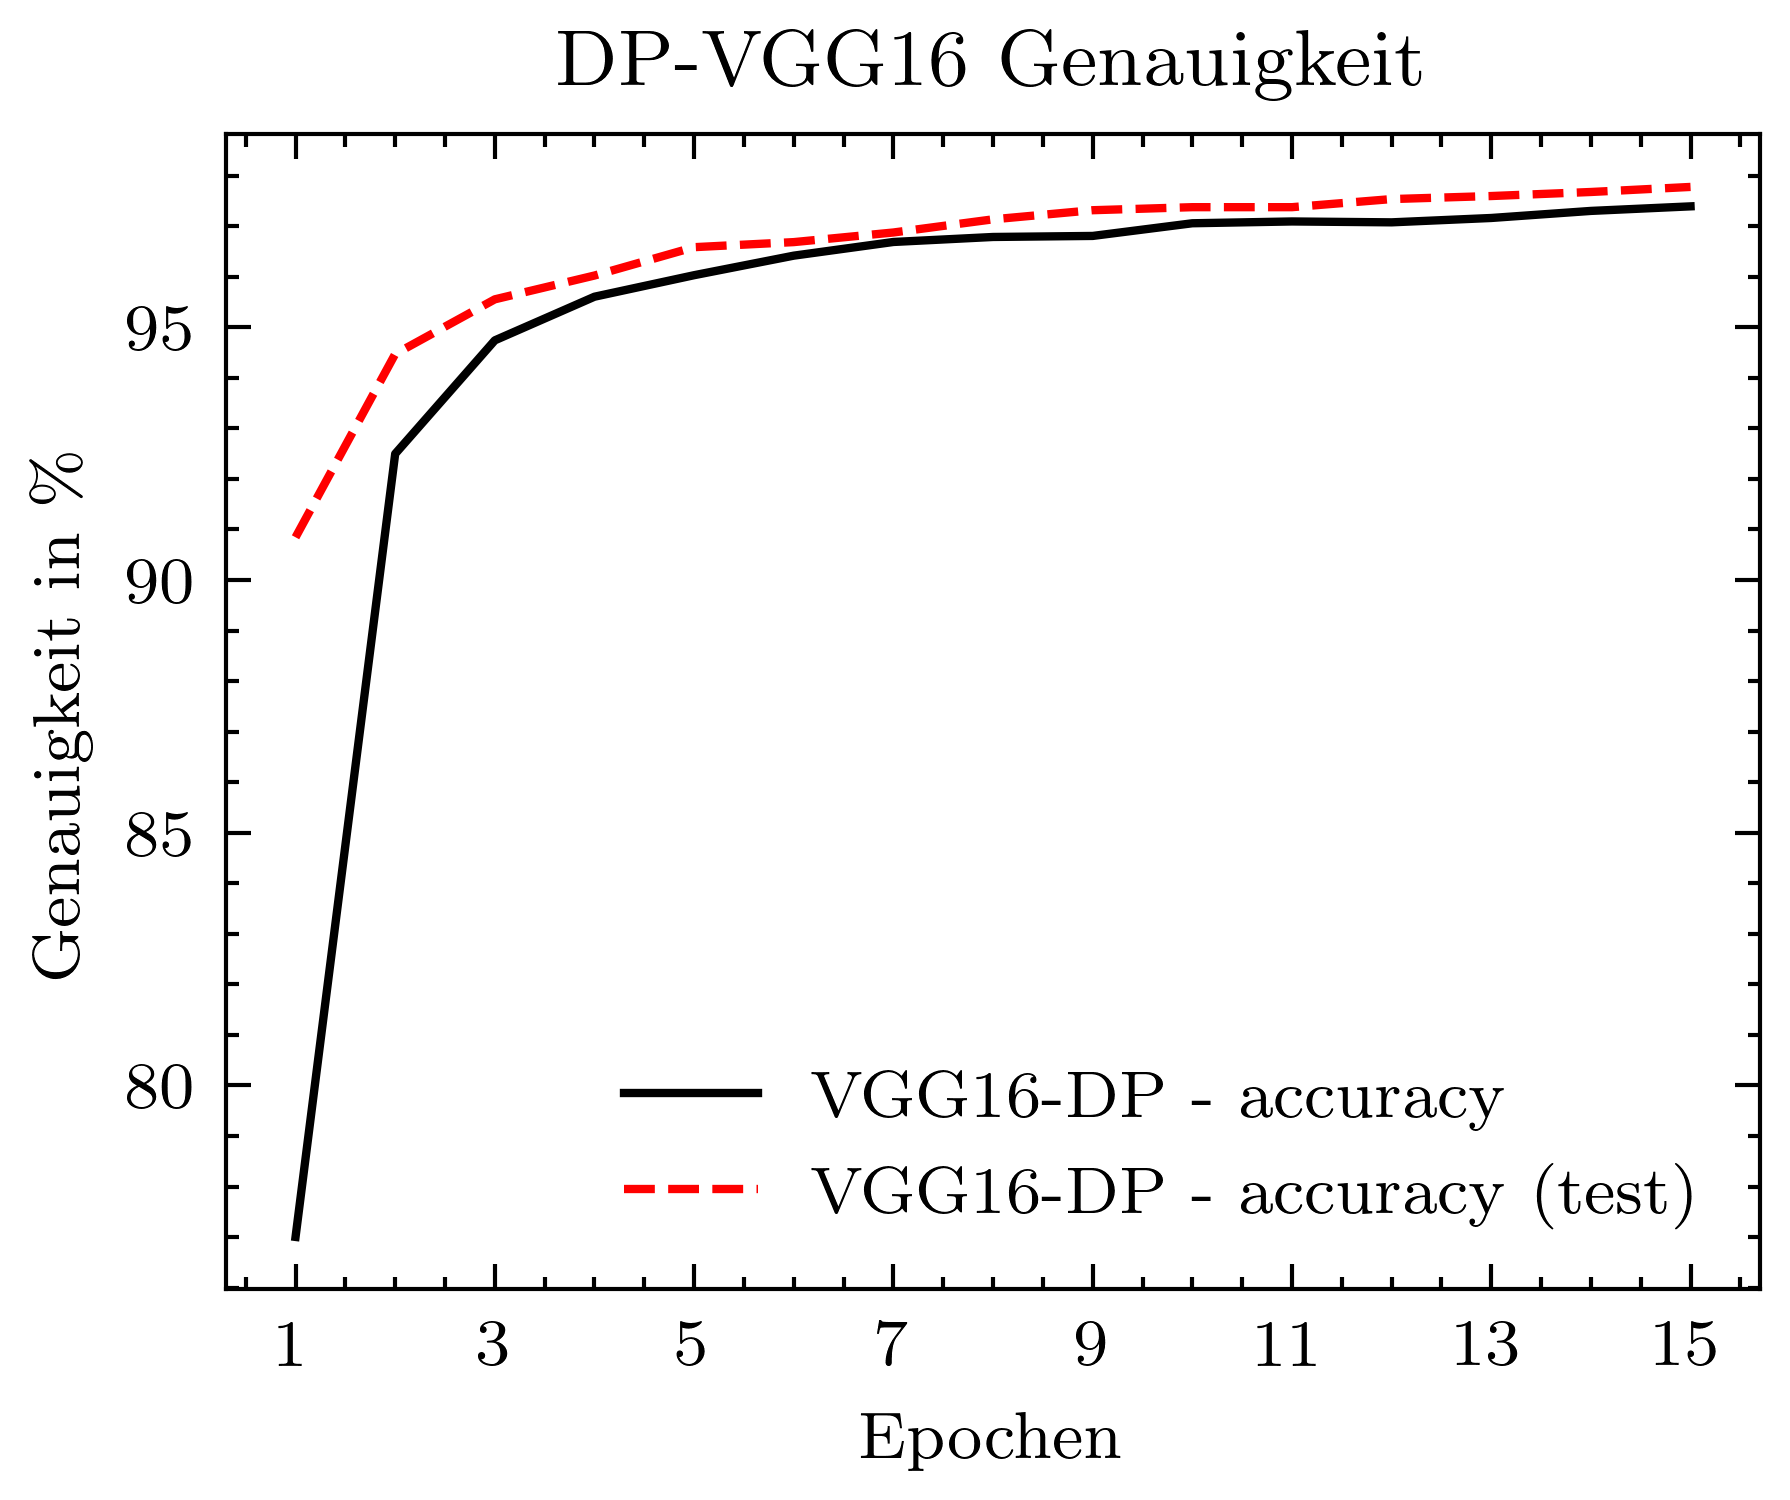

In [15]:
import os
trainer.plotter.sciencePlot(save_path=os.path.join(trainer.GRAPH_PATH, "dp_acc.png"), plot_title="DP-VGG16 Genauigkeit", x_label="Epochen", y_label="Genauigkeit in \%", graphs=[acc, acc_t])

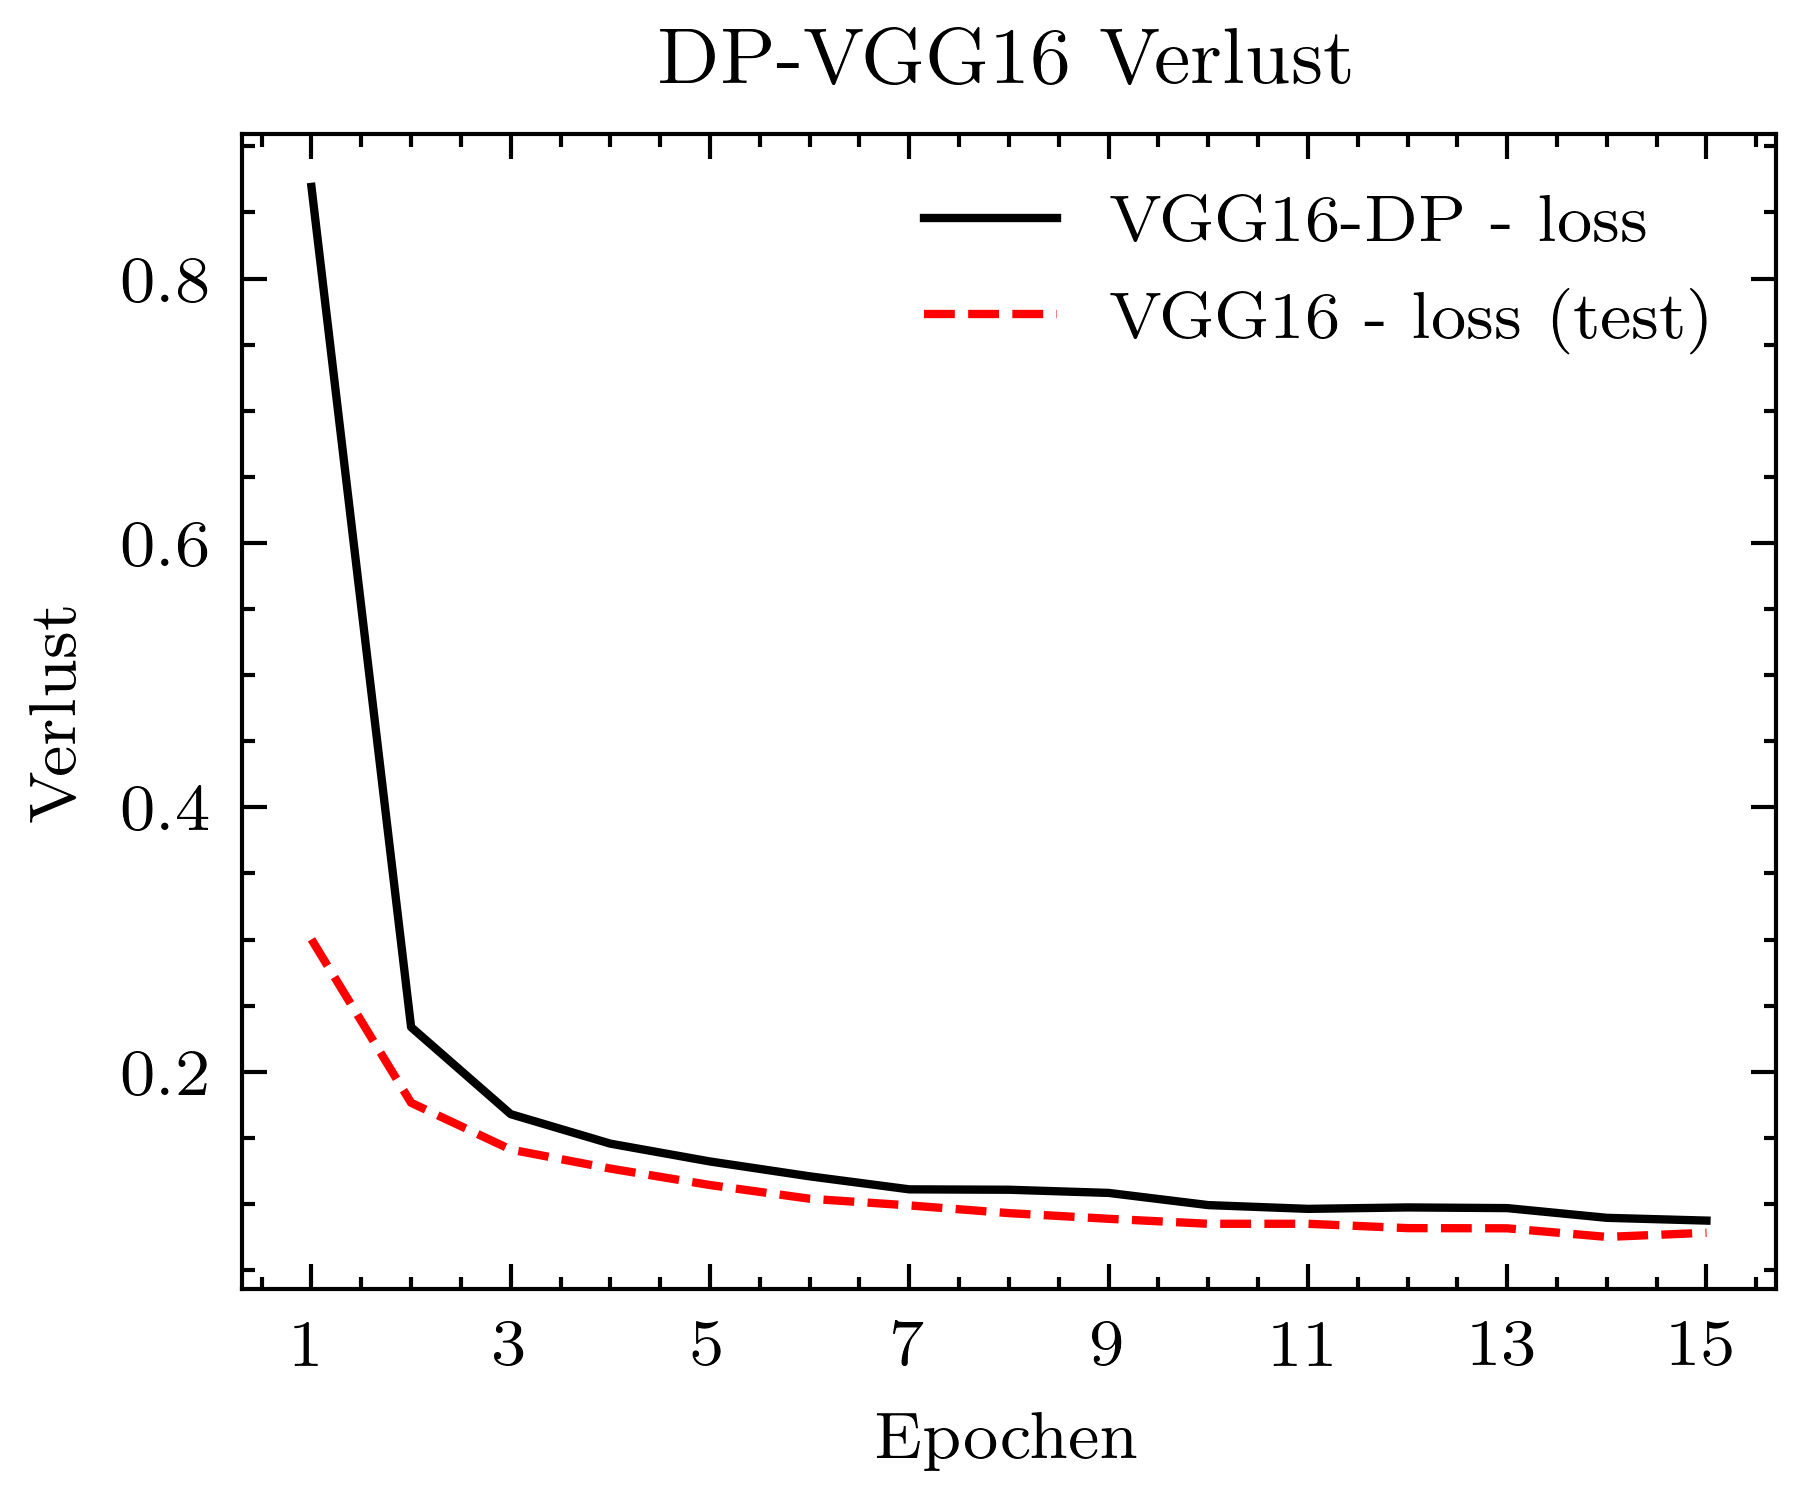

In [16]:
trainer.plotter.sciencePlot(save_path=os.path.join(trainer.GRAPH_PATH, "dp_loss.png"), plot_title="DP-VGG16 Verlust", x_label="Epochen", y_label="Verlust", graphs=[loss, loss_t])

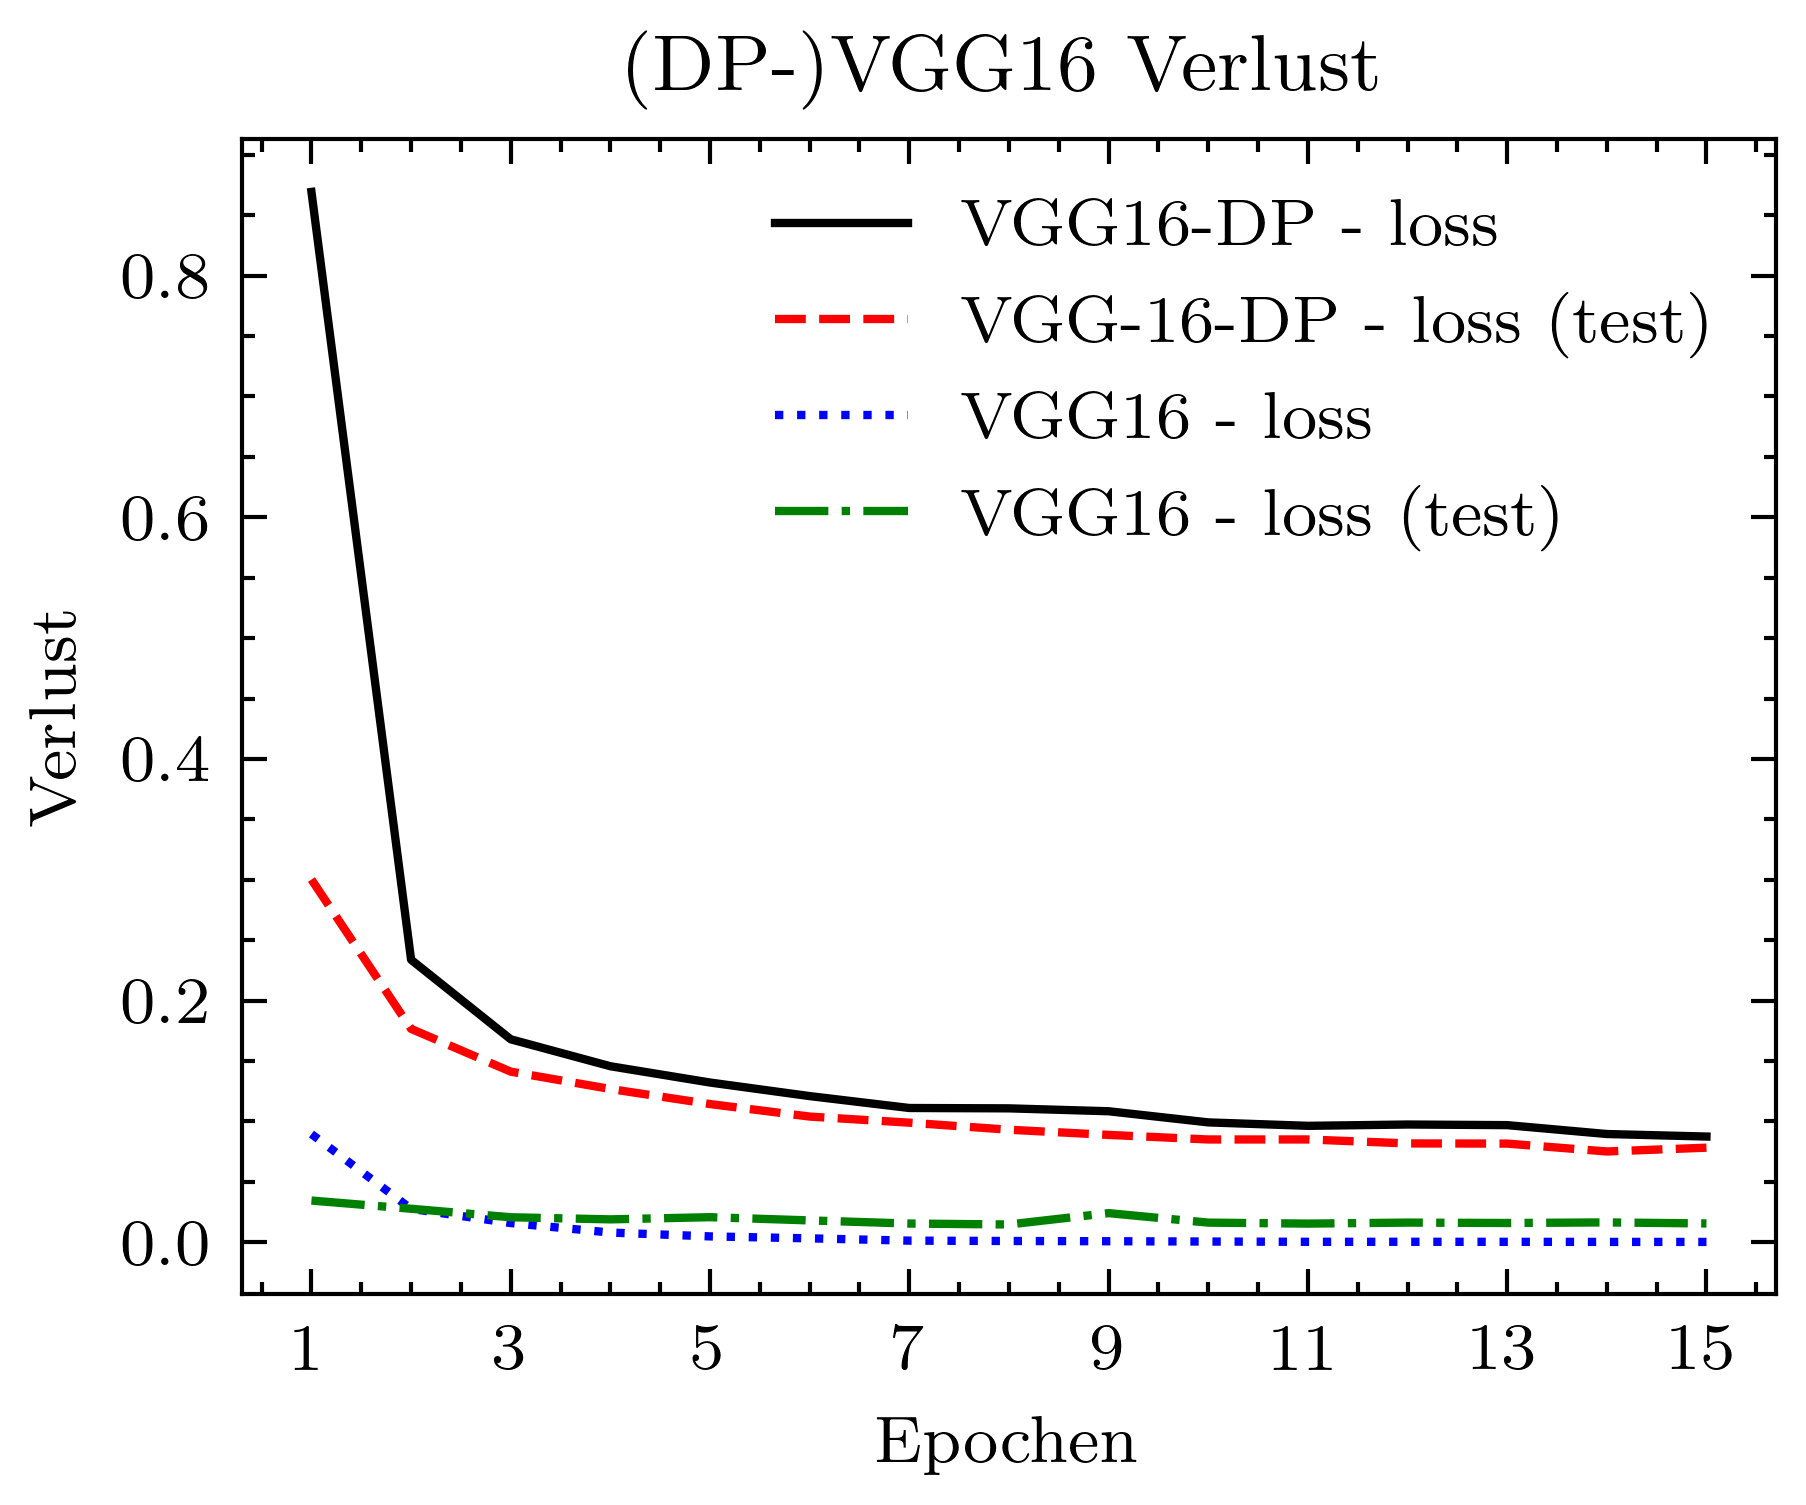

In [20]:
loss_t[0] = "VGG-16-DP - loss (test)"
trainer.plotter.sciencePlot(save_path=os.path.join(trainer.GRAPH_PATH, "dp_nn_loss.png"), plot_title="(DP-)VGG16 Verlust", x_label="Epochen", y_label="Verlust", graphs=[loss, loss_t, loss_nn, loss_t_nn])

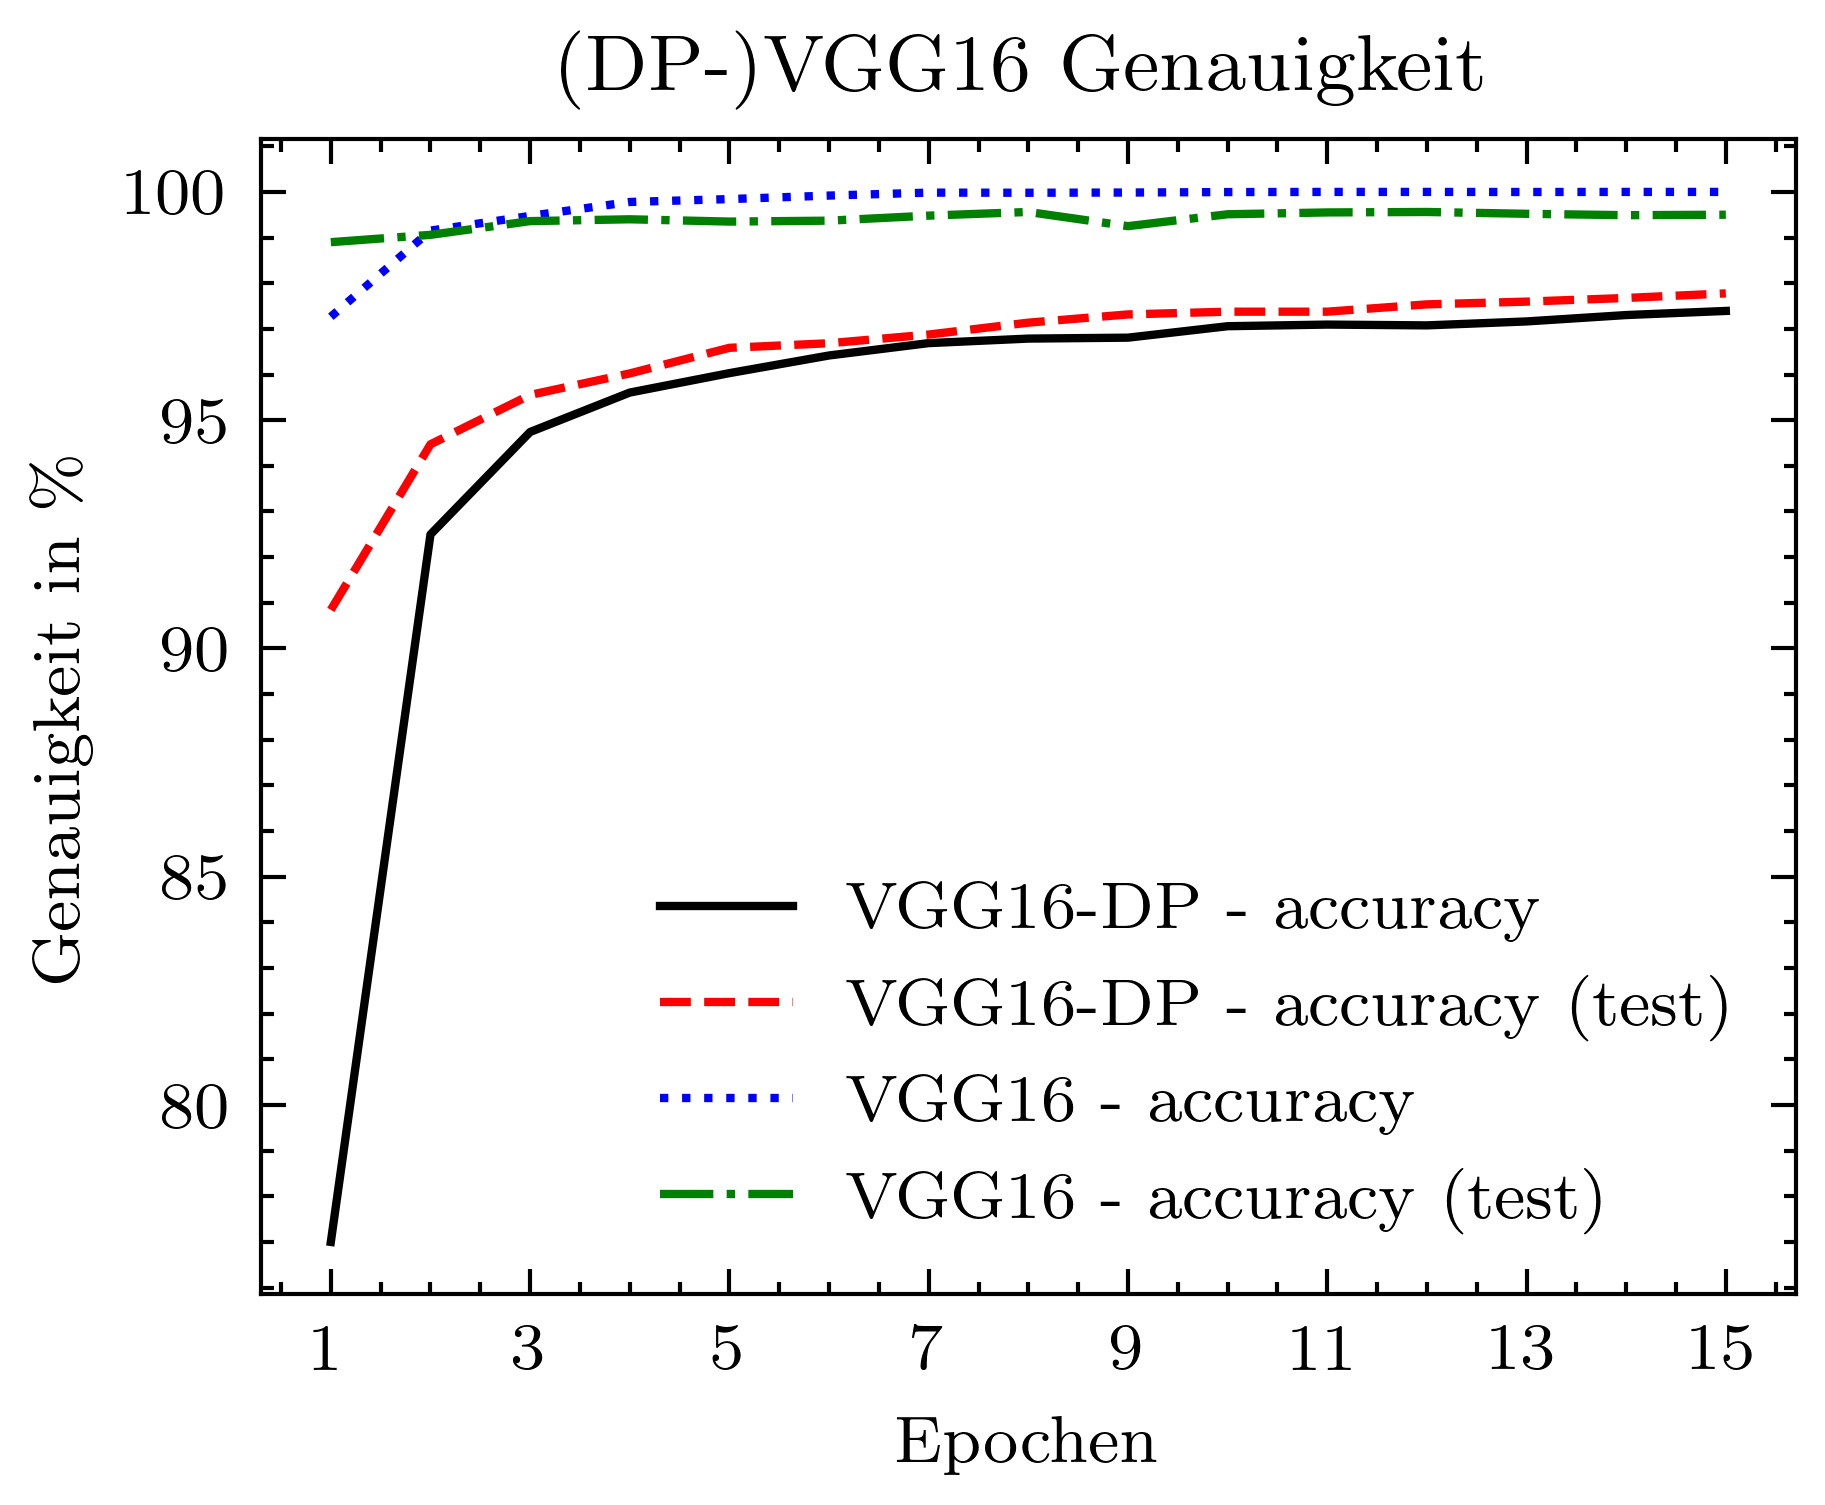

In [21]:
trainer.plotter.sciencePlot(save_path=os.path.join(trainer.GRAPH_PATH, "dp_nn_acc.png"), plot_title="(DP-)VGG16 Genauigkeit", x_label="Epochen", y_label="Genauigkeit in \%", graphs=[acc, acc_t, acc_nn, acc_t_nn])

In [10]:
del trainer

In [2]:
trainer = Trainer(dataset="mnist", mode="nn")
loss_nn, acc_nn, loss_t_nn, acc_t_nn = trainer.train()

{'name': 'mnist', 'model_name': 'VGG16', 'gray': True, 'torch': True, 'num_classes': 10, 'local': False}
----------------Loading datasets-----------------
Dataset MNIST
    Number of datapoints: 60000
    Root location: datasets/mnist
    Split: Train
    StandardTransform
Transform: Compose(
               Grayscale(num_output_channels=3)
               ToTensor()
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )
---------------Loading dataloader----------------
DataLoader initialized
DataLoader initialized


/home/bot/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/bot/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Draw Graph in Tensorboard


/home/bot/.local/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/home/bot/.local/lib/python3.10/site-packages/torch/jit/_trace.py:1065: TracerWarning: Encountering a list at the output of the tracer might cause the trace to be incorrect, this is only valid if the container structure does not change based on the module's inputs. Consider usin

Training-Process started!
Epoch:0	Time:78.81	Train Loss:0.09	Train Acc:97.27	Test Acc98.90
Epoch:1	Time:78.45	Train Loss:0.03	Train Acc:99.15	Test Acc99.06
Epoch:2	Time:78.41	Train Loss:0.02	Train Acc:99.47	Test Acc99.36
Epoch:3	Time:78.82	Train Loss:0.01	Train Acc:99.78	Test Acc99.40
Epoch:4	Time:77.05	Train Loss:0.00	Train Acc:99.84	Test Acc99.35
Epoch:5	Time:73.03	Train Loss:0.00	Train Acc:99.92	Test Acc99.37
Epoch:6	Time:79.31	Train Loss:0.00	Train Acc:99.98	Test Acc99.48
Epoch:7	Time:79.32	Train Loss:0.00	Train Acc:99.98	Test Acc99.56
Epoch:8	Time:78.91	Train Loss:0.00	Train Acc:99.98	Test Acc99.25
Epoch:9	Time:78.98	Train Loss:0.00	Train Acc:100.00	Test Acc99.51
Epoch:10	Time:70.85	Train Loss:0.00	Train Acc:100.00	Test Acc99.55
Epoch:11	Time:71.12	Train Loss:0.00	Train Acc:100.00	Test Acc99.56
Epoch:12	Time:71.00	Train Loss:0.00	Train Acc:100.00	Test Acc99.52
Epoch:13	Time:70.75	Train Loss:0.00	Train Acc:100.00	Test Acc99.49
Epoch:14	Time:71.36	Train Loss:0.00	Train Acc:100.00	Te

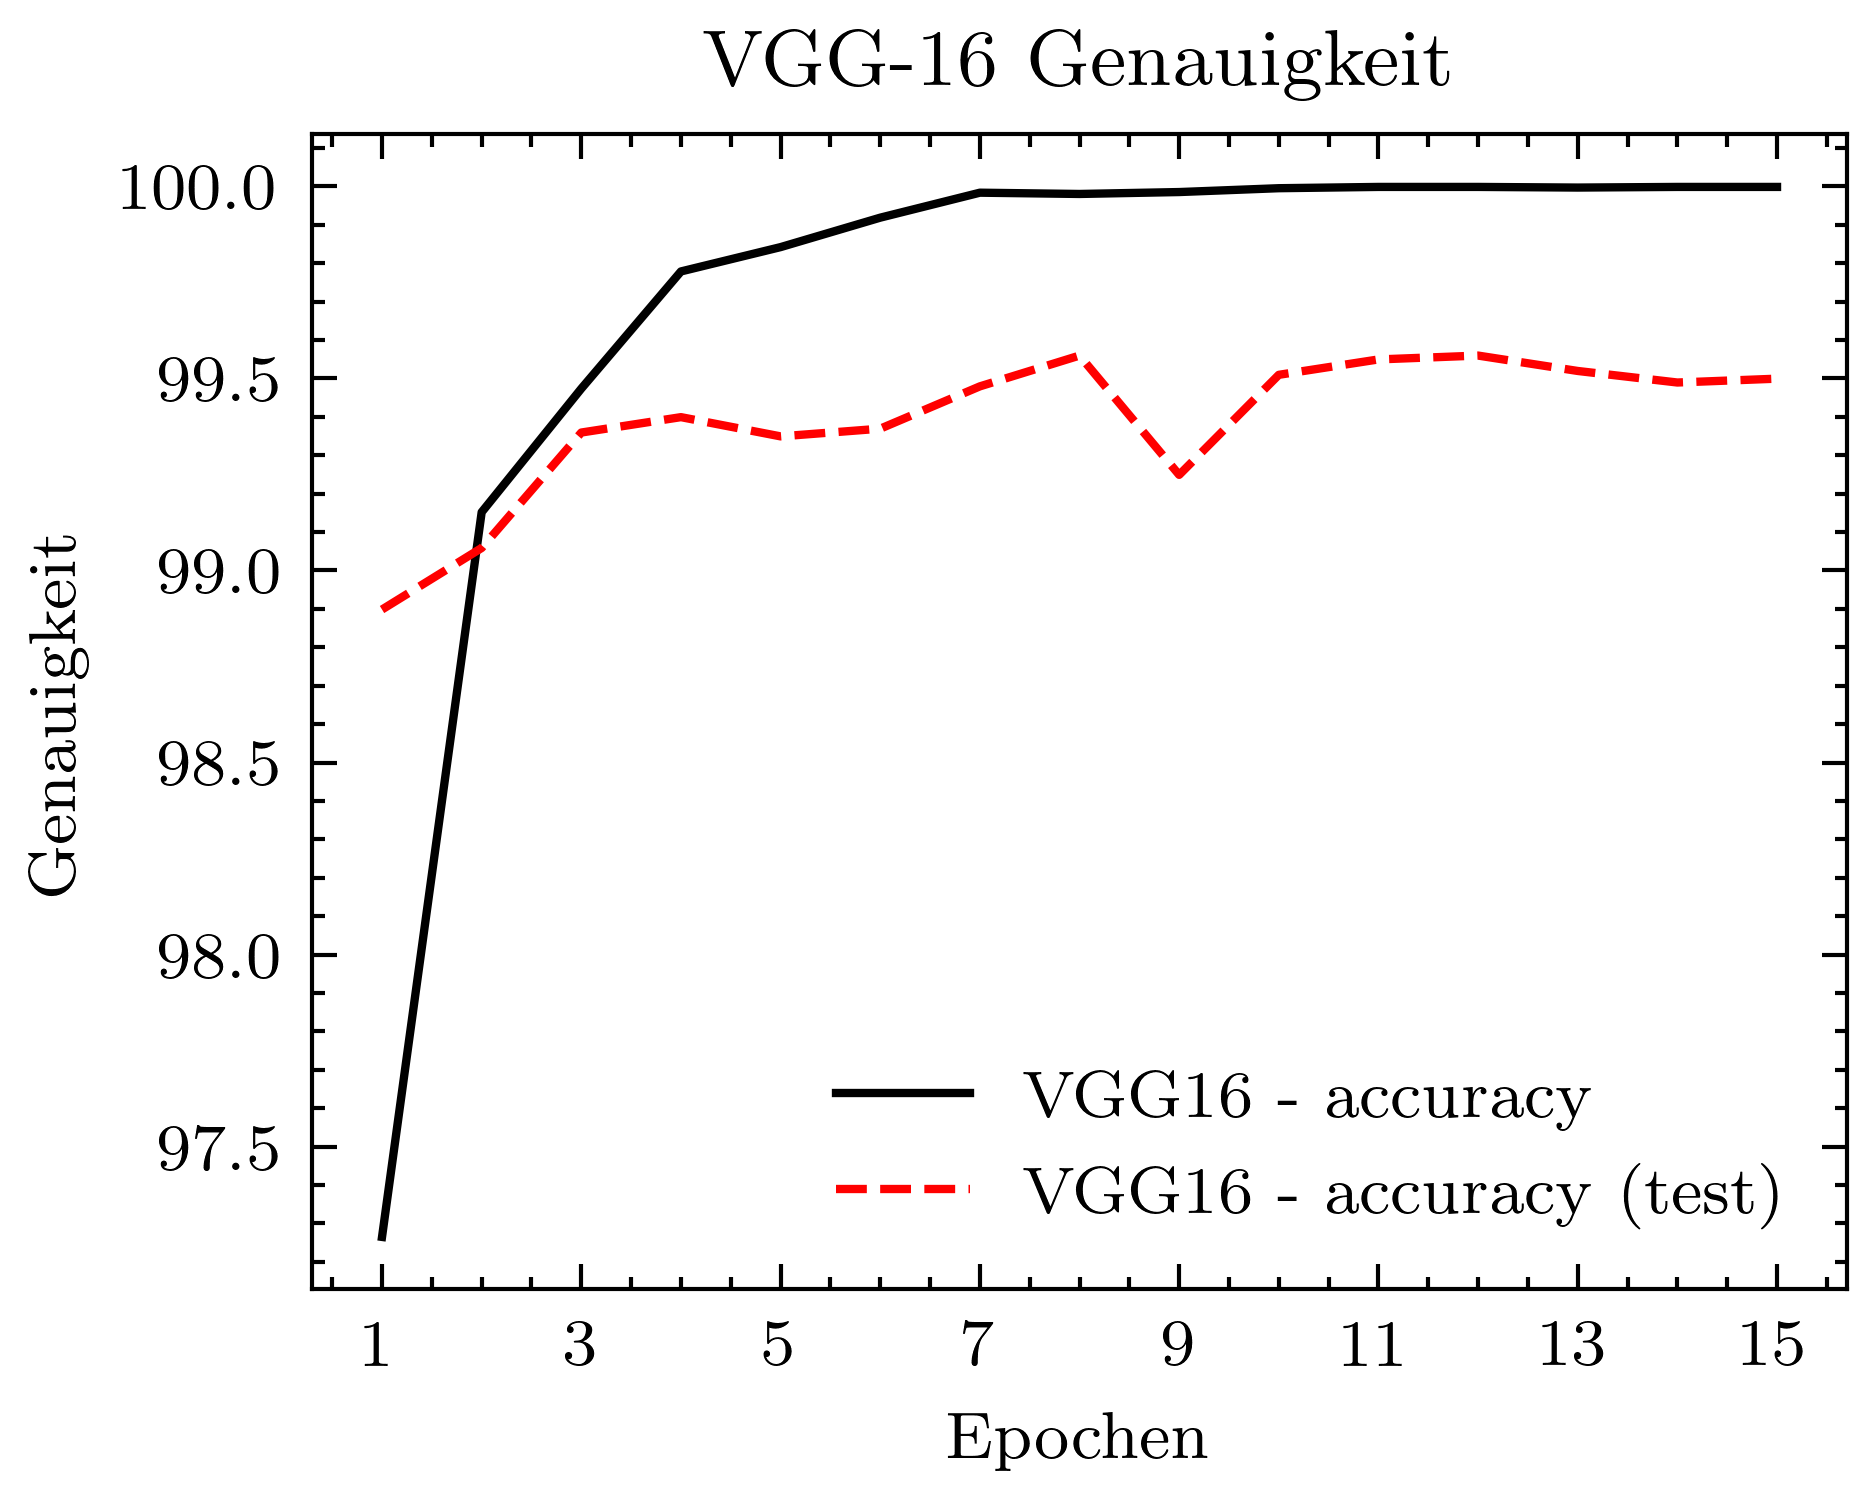

In [9]:
import os
trainer.plotter.sciencePlot(save_path=os.path.join(trainer.GRAPH_PATH, "nn_acc.png"), plot_title="VGG-16 Genauigkeit", x_label="Epochen", y_label="Genauigkeit", graphs=[acc_nn, acc_t_nn])

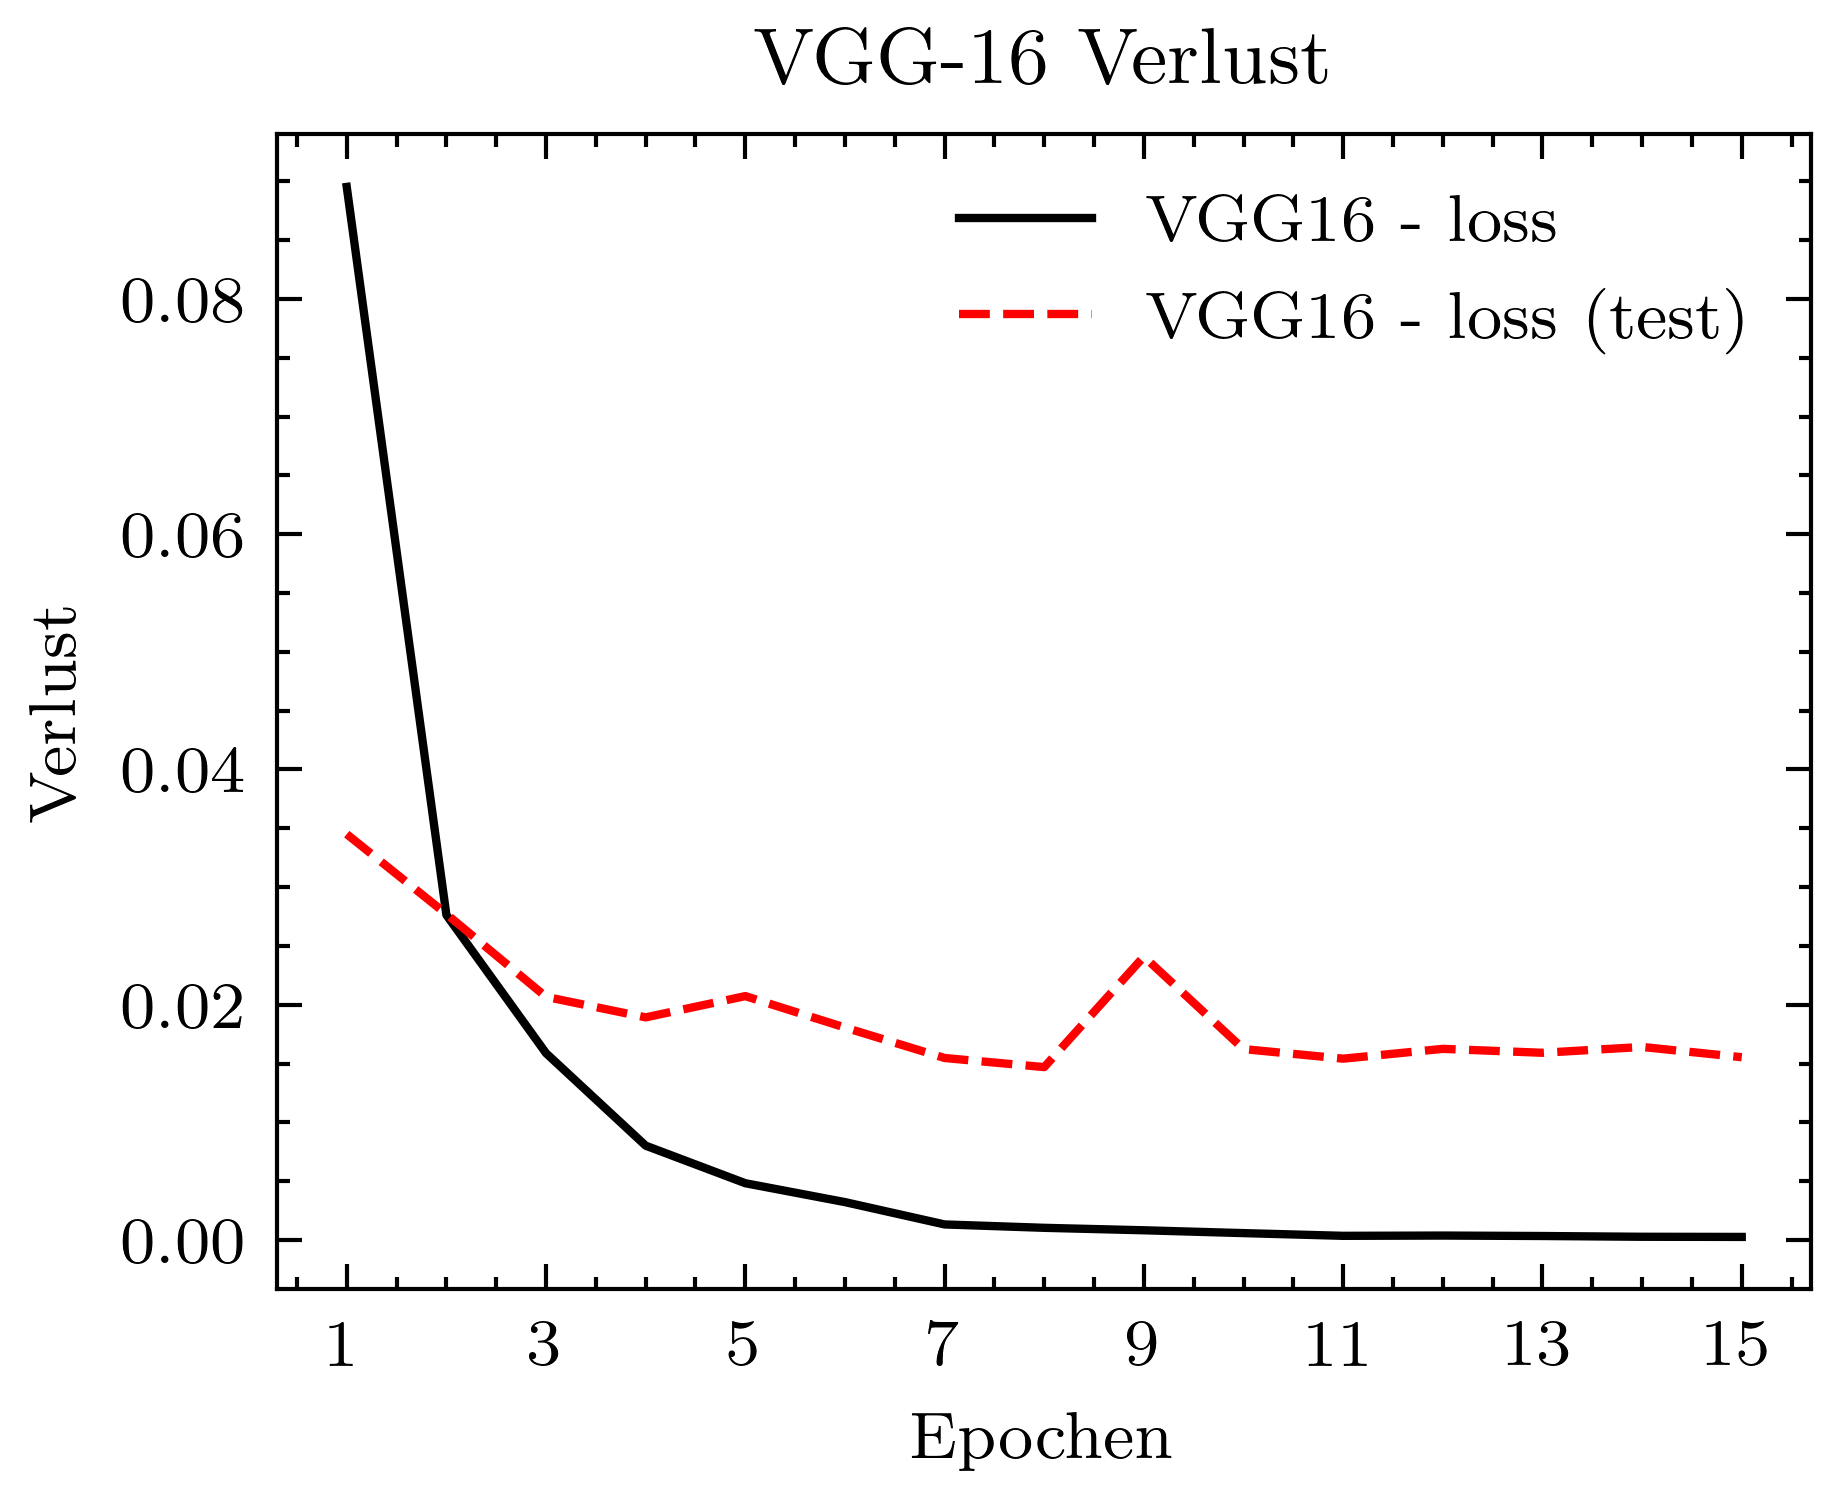

In [7]:
trainer.plotter.sciencePlot(save_path=os.path.join(trainer.GRAPH_PATH, "nn_loss.png"), plot_title="VGG-16 Verlust", x_label="Epochen", y_label="Verlust", graphs=[loss_nn, loss_t_nn])

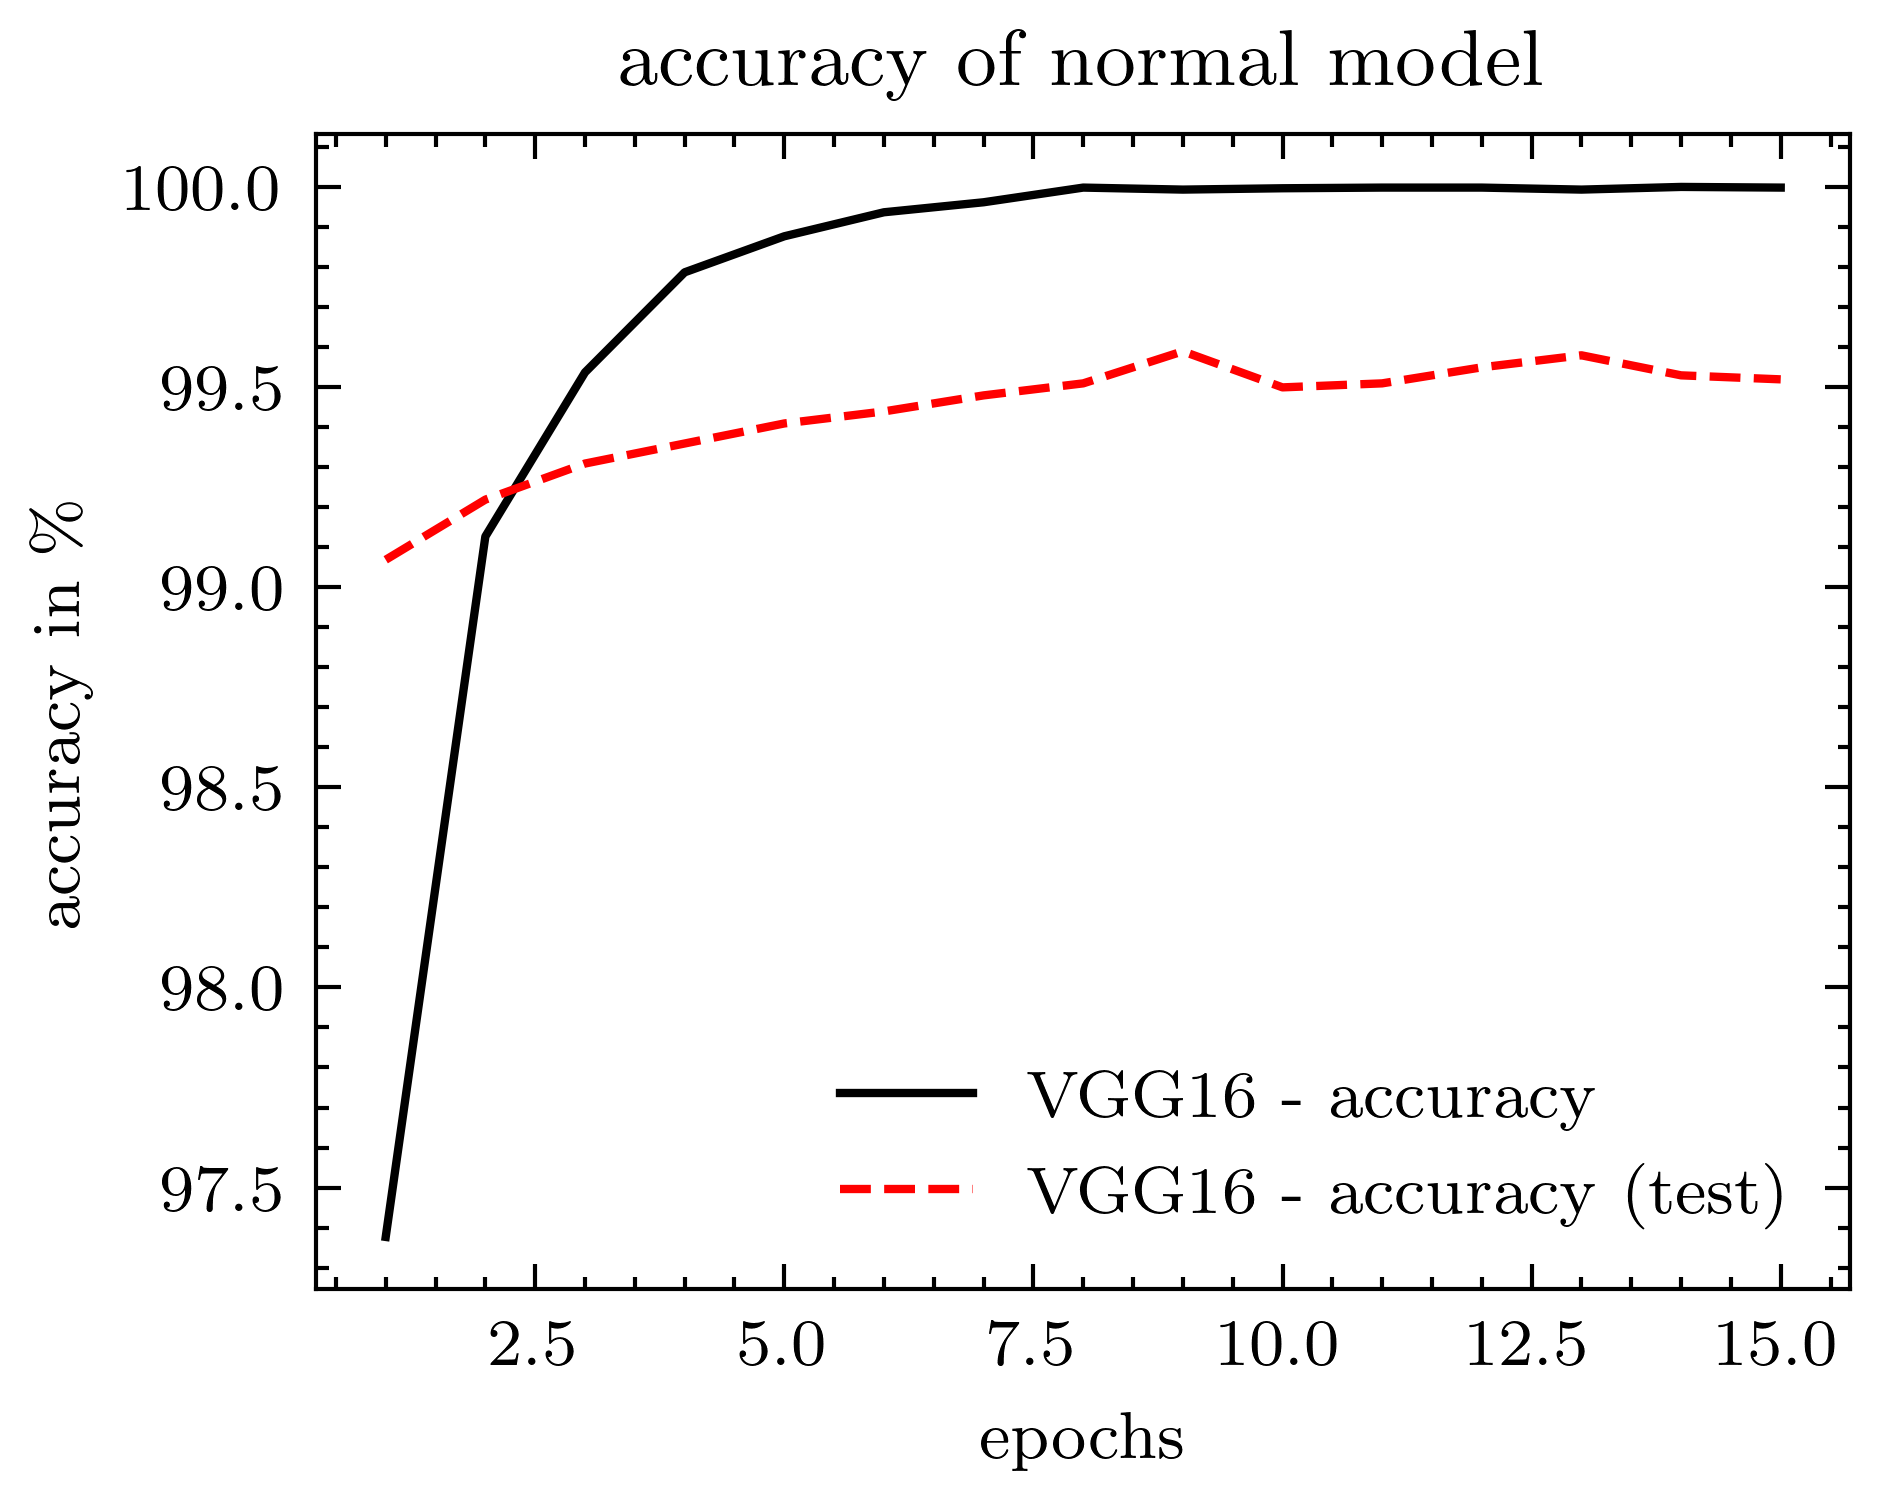

In [16]:
trainer.plotter.sciencePlot(save_path=os.path.join(trainer.GRAPH_PATH, "nn_acc.png"), plot_title="accuracy of normal model", x_label="epochs", y_label="accuracy in \%", graphs=[acc_nn, acc_t_nn])

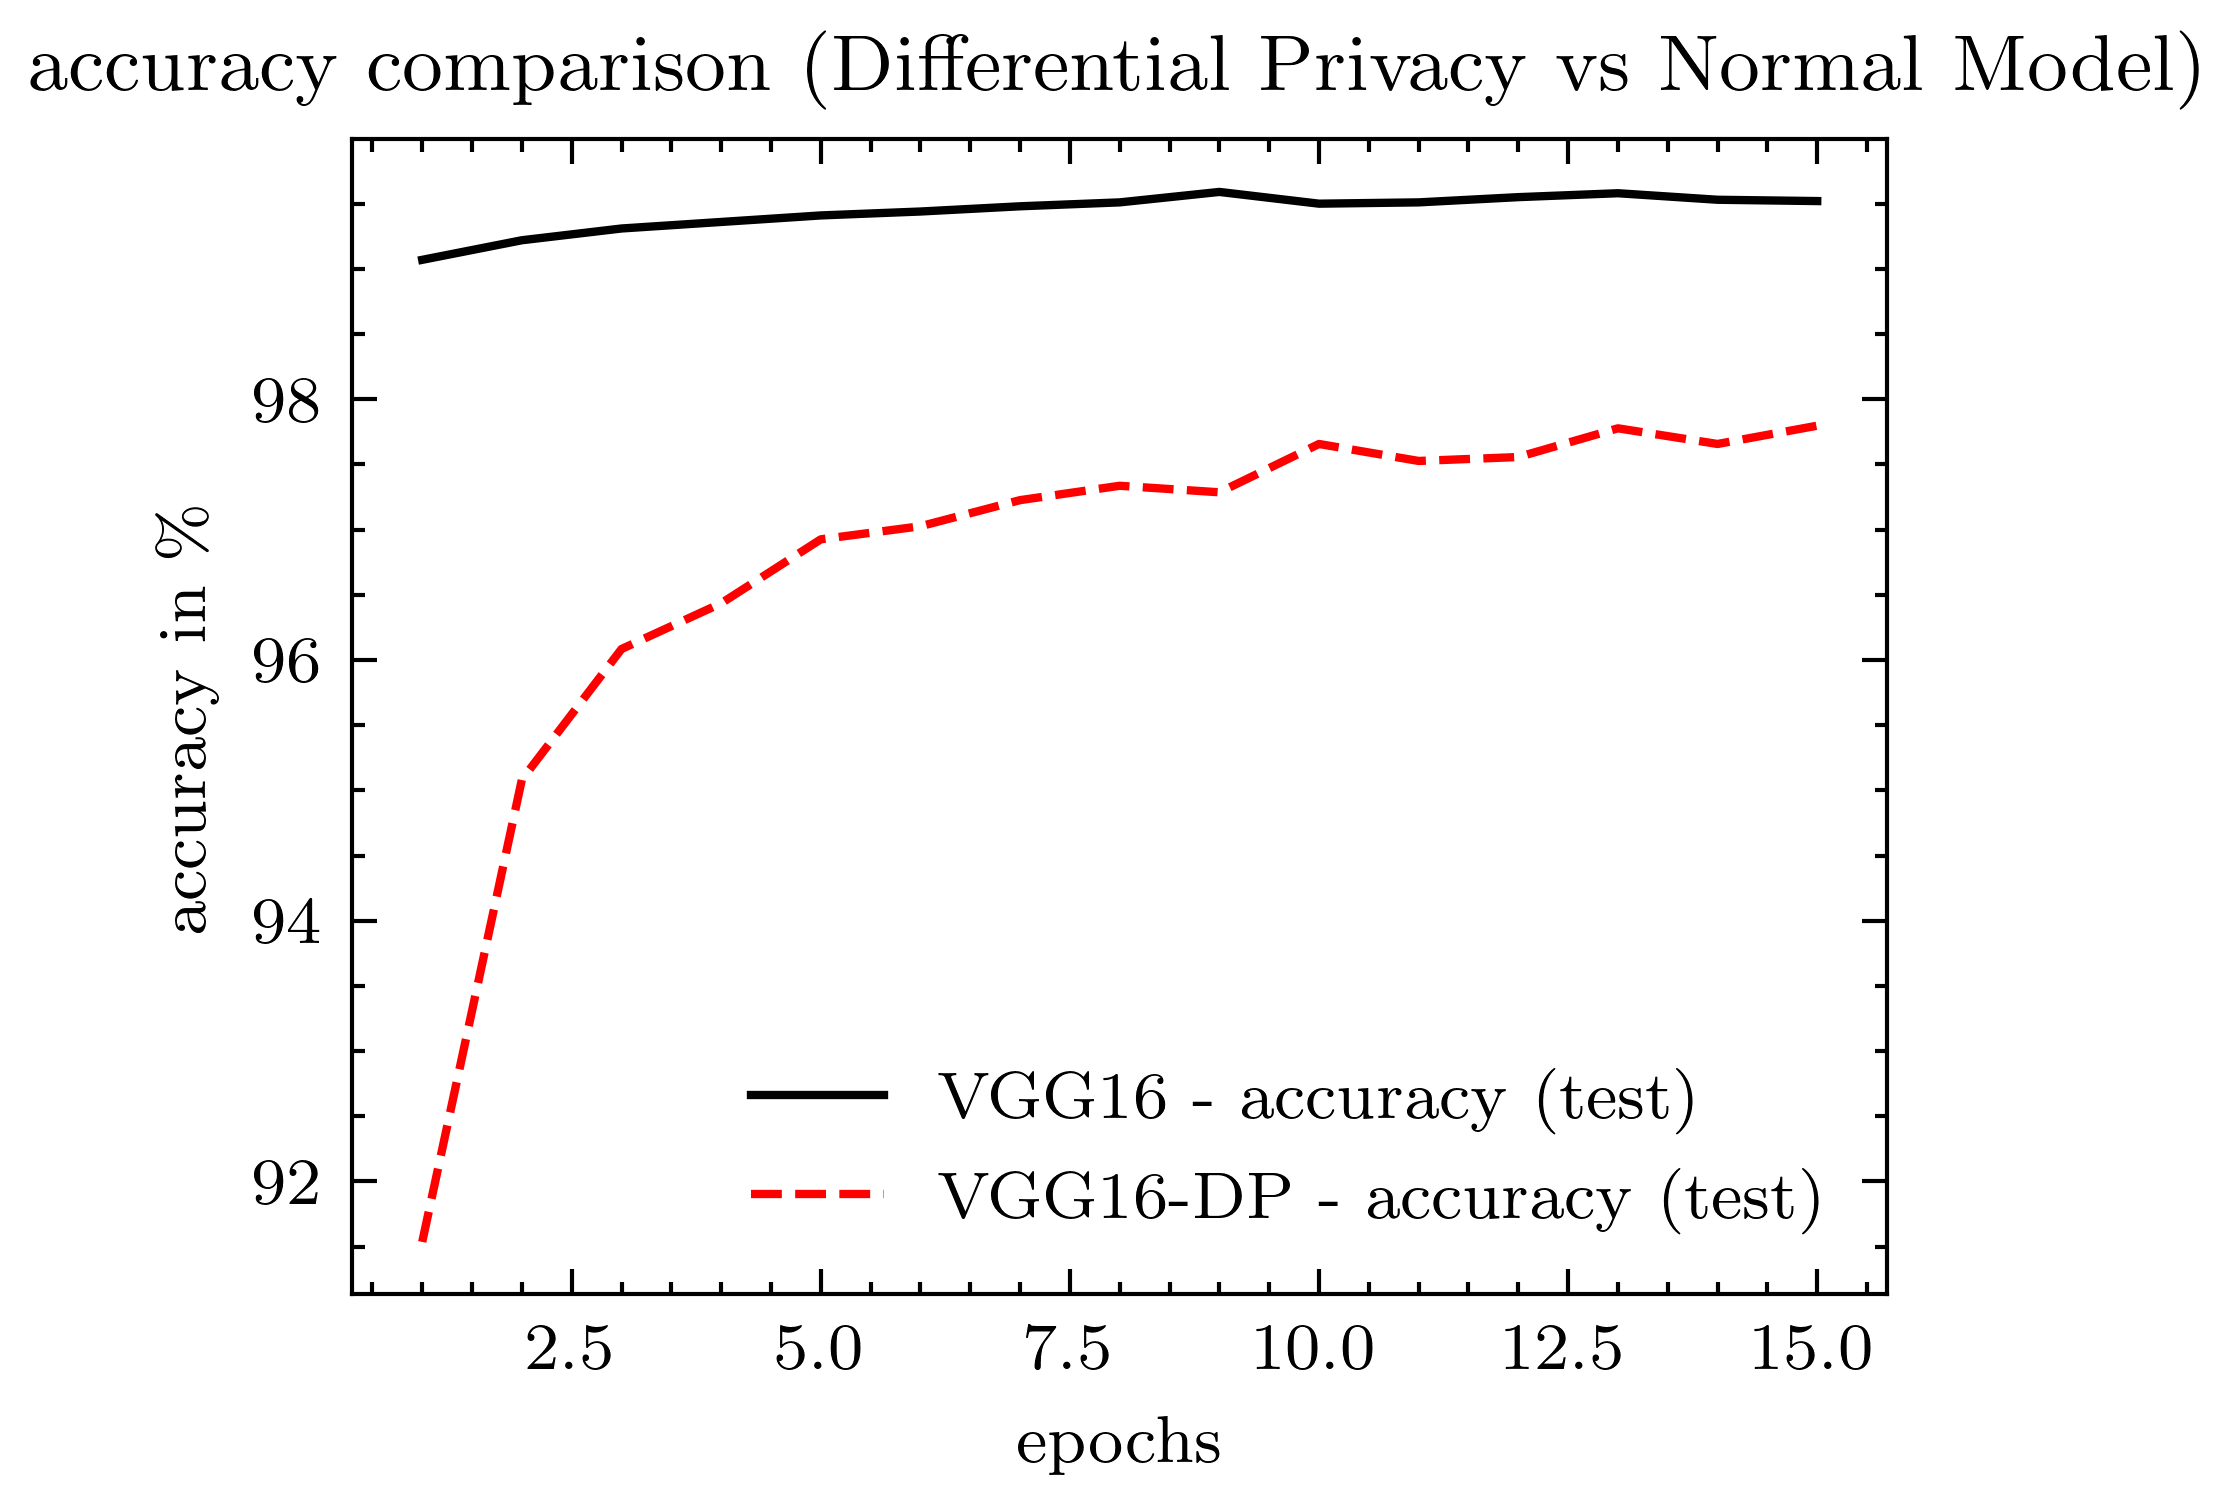

In [18]:
trainer.plotter.sciencePlot(save_path=os.path.join(trainer.GRAPH_PATH, "nn_dp_acc.png"), plot_title="accuracy comparison (Differential Privacy vs Normal Model)", x_label="epochs", y_label="accuracy in \%", graphs=[acc_t_nn, acc_t])

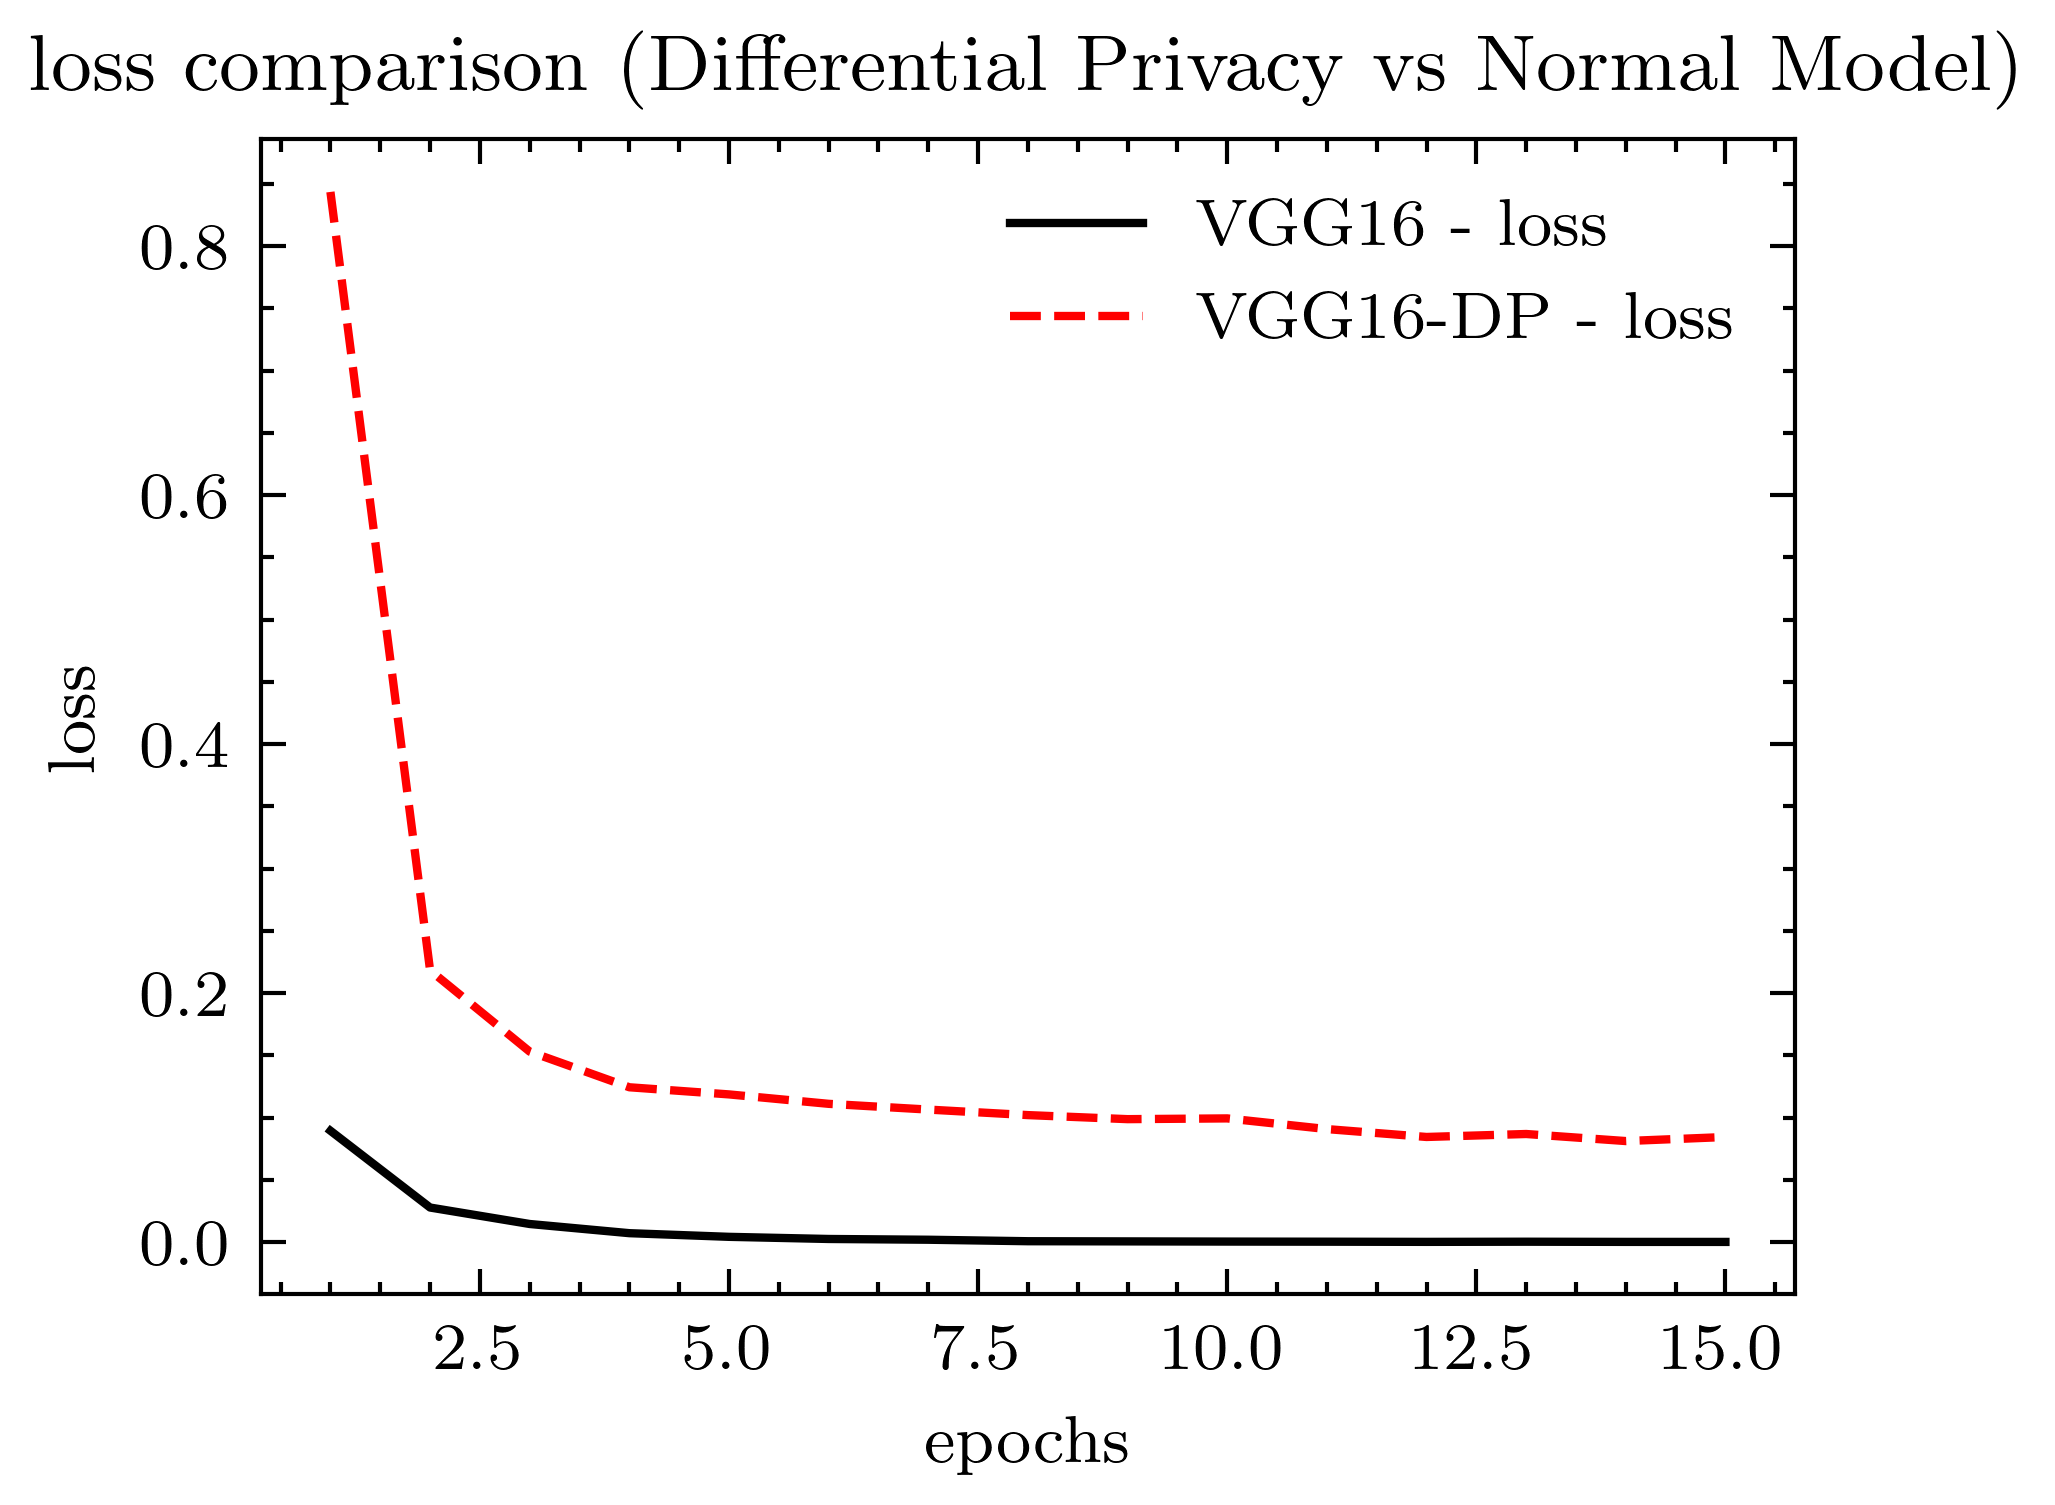

In [19]:
trainer.plotter.sciencePlot(save_path=os.path.join(trainer.GRAPH_PATH, "nn_dp_loss.png"), plot_title="loss comparison (Differential Privacy vs Normal Model)", x_label="epochs", y_label="loss", graphs=[loss_nn, loss])